In [19]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt

$\textbf{1.-Tasa de mortalidad nivel mundial por país, por cada mi habitantes.}$

In [20]:
dfs = pd.read_html('https://www.indexmundi.com/map/?t=0&v=26&r=xx&l=en')
rawdata=dfs[1]
rawdata.to_csv('deathrate2018.csv')
rawdata

,Country,"Death rate (deaths/1,000 population)",Year
0,Lesotho,15,2018
1,Lithuania,15,2018
2,Latvia,15,2018
3,Bulgaria,15,2018
4,Ukraine,14,2018
...,...,...,...
192,Saudi Arabia,3,2018
193,Bahrain,3,2018
194,Kuwait,2,2018
195,United Arab Emirates,2,2018


In [21]:
rawdata.columns
rawdata['Death rate (deaths/1,000 population)']
rawdata['Death rate (deaths/1,000 population)'].describe()

count    197.000000
mean       7.776650
std        2.678498
min        2.000000
25%        6.000000
50%        8.000000
75%        9.000000
max       15.000000
Name: Death rate (deaths/1,000 population), dtype: float64

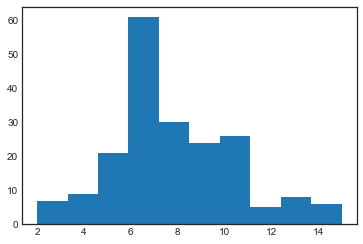

In [22]:
plt.hist(rawdata['Death rate (deaths/1,000 population)']);

$\textbf{2.-Porcentaje de obesidad en adultos por país}$

In [23]:
dfs2 = pd.read_html('https://www.indexmundi.com/map/?t=0&v=2228&r=xx&l=en')
rawdata2=dfs2[1]
rawdata2.to_csv('obesity2016.csv')
rawdata2

,Country,Obesity - adult prevalence rate (%),Year
0,Nauru,61,2016
1,Palau,55,2016
2,Tuvalu,52,2016
3,Tonga,48,2016
4,Samoa,47,2016
...,...,...,...
180,India,4,2016
181,Cambodia,4,2016
182,East Timor,4,2016
183,Bangladesh,4,2016


In [24]:
rawdata2.columns
rawdata2['Obesity - adult prevalence rate (%)'].describe()

count    185.000000
mean      19.383784
std       10.572666
min        2.000000
25%       10.000000
50%       21.000000
75%       25.000000
max       61.000000
Name: Obesity - adult prevalence rate (%), dtype: float64

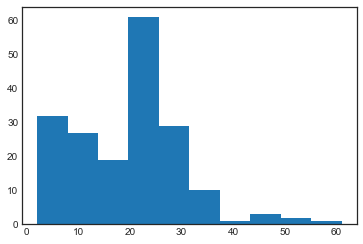

In [25]:
plt.style.use('seaborn-white')
plt.hist(rawdata2['Obesity - adult prevalence rate (%)']);

$\textbf{3.-Densidad de camas de hospitales por cada mil habitantes.}$

In [26]:
dfs3 = pd.read_html('https://www.indexmundi.com/map/?t=0&v=2227&r=xx&l=en')
rawdata3=dfs3[1]
rawdata3.to_csv('hospitalbeddensity.csv')
rawdata3

,Country,"Hospital bed density (beds/1,000 population)",Year
0,Monaco,14,2012
1,Japan,13,2012
2,"Korea, North",13,2012
3,"Korea, South",12,2015
4,Belarus,11,2013
...,...,...,...
167,Guinea,0,2011
168,Ethiopia,0,2015
169,Iran,0,2014
170,Madagascar,0,2010


In [27]:
rawdata3.columns
print(rawdata3['Hospital bed density (beds/1,000 population)'].describe())
print(rawdata3['Country'].describe())

count    172.000000
mean       3.337209
std        2.636276
min        0.000000
25%        1.000000
50%        3.000000
75%        5.000000
max       14.000000
Name: Hospital bed density (beds/1,000 population), dtype: float64
count          172
unique         172
top       Bulgaria
freq             1
Name: Country, dtype: object


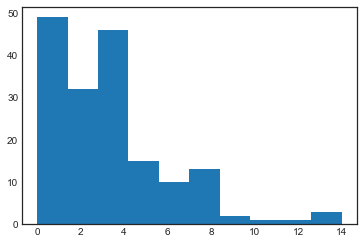

In [28]:
plt.hist(rawdata3['Hospital bed density (beds/1,000 population)']);

$\textbf{¿Cuáles son los países con mayor death rate?}$

Como vemos en las primeras líneas de código el la tasa máxima de muerte por cada mil habitantes es 15 habitantes, entonces los países que tienen una  mayor o igual a 14:

In [29]:
rawdata[(rawdata['Death rate (deaths/1,000 population)'] >= 14.0)]

,Country,"Death rate (deaths/1,000 population)",Year
0,Lesotho,15,2018
1,Lithuania,15,2018
2,Latvia,15,2018
3,Bulgaria,15,2018
4,Ukraine,14,2018
5,Serbia,14,2018


$\textbf{Países con mayor obesidad}$

In [59]:
rawdata2['Obesity - adult prevalence rate (%)'].max()

61

Los países con mayor tasa de prevalencia de la obesidad en adultos tienen un $50\%$ y son los siguientes

In [31]:
rawdata2[(rawdata2['Obesity - adult prevalence rate (%)'] >=50.0)]

,Country,Obesity - adult prevalence rate (%),Year
0,Nauru,61,2016
1,Palau,55,2016
2,Tuvalu,52,2016


$\textbf{Países con mayor saturación de camas}$

In [14]:
rawdata3['Hospital bed density (beds/1,000 population)'].max()

14

In [15]:
rawdata3[(rawdata3['Hospital bed density (beds/1,000 population)'] >=14.0)]

,Country,"Hospital bed density (beds/1,000 population)",Year
0,Monaco,14,2012


In [16]:
rawdata3['Hospital bed density (beds/1,000 population)'].min()

0

In [17]:
rawdata3[(rawdata3['Hospital bed density (beds/1,000 population)'] <=0.0)]

,Country,"Hospital bed density (beds/1,000 population)",Year
166,Burkina Faso,0,2010
167,Guinea,0,2011
168,Ethiopia,0,2015
169,Iran,0,2014
170,Madagascar,0,2010
171,Mali,0,2010


$\textbf{¿Qué porcentaje de países tienen una persistencia de obesidad mayor al 30\%}$

In [36]:
len(rawdata2[(rawdata2['Obesity - adult prevalence rate (%)'] >30.0)])/(len(rawdata2['Obesity - adult prevalence rate (%)']))*100

9.72972972972973

In [56]:
df3 =pd.merge(left=dfs[1], right=dfs2[1],left_on='Country', right_on='Country')
display(df3)

,Country,"Death rate (deaths/1,000 population)",Year_x,Obesity - adult prevalence rate (%),Year_y
0,Lesotho,15,2018,17,2016
1,Lithuania,15,2018,26,2016
2,Latvia,15,2018,24,2016
3,Bulgaria,15,2018,25,2016
4,Ukraine,14,2018,24,2016
...,...,...,...,...,...
180,Saudi Arabia,3,2018,35,2016
181,Bahrain,3,2018,30,2016
182,Kuwait,2,2018,38,2016
183,United Arab Emirates,2,2018,32,2016
